Following Longxu's advice, we will deliberately break the sentences and see if the training differs

In [2]:
import os
import glob
import json
import tqdm

In [3]:
json_path = '/home/aiops/zhuty/ret_pretraining_data/c4_news_id_added/train/'
def read_jsonl(paths):
    """Read a JSON Lines file and return a list of documents."""
    documents = []
    for file_path in tqdm.tqdm(paths):
        with open(file_path, 'r') as file:
            for line in file:
                document = json.loads(line)
                document['text'] = document['contents']
                del document['contents']
                documents.append(document)
    return documents


In [4]:
documents = read_jsonl(glob.glob(os.path.join(json_path, '*.jsonl'))[:])

100%|██████████| 502/502 [02:37<00:00,  3.19it/s]


In [5]:
len(documents)

13530310

Total number of paragraphs:  152692270
Average number of paragraphs:  11.285201152080033
Max number of paragraphs:  1941
Min number of paragraphs:  1


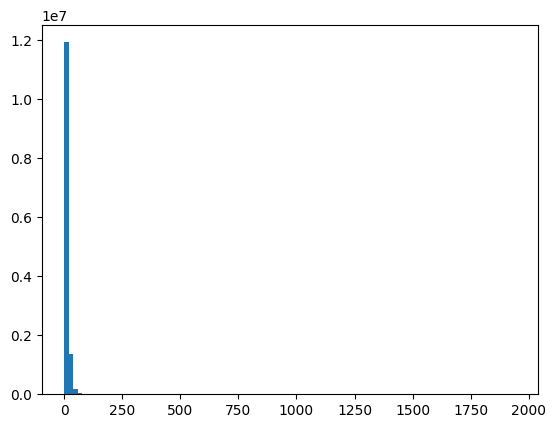

In [6]:
num_of_paragraphs = []
all_paragraphs = []
for doc in documents:
    paragraphs = doc['text'].split("\n")
    num_of_paragraphs.append(len(paragraphs))
    all_paragraphs.extend(paragraphs)

# get some stats on the number of paragraphs
print("Total number of paragraphs: ", sum(num_of_paragraphs))
print("Average number of paragraphs: ", sum(num_of_paragraphs)/len(num_of_paragraphs))
print("Max number of paragraphs: ", max(num_of_paragraphs))
print("Min number of paragraphs: ", min(num_of_paragraphs))

import matplotlib.pyplot as plt
# plot histogram of the number of paragraphs
plt.hist(num_of_paragraphs, bins=100)
plt.show()




In [7]:
import random
random.seed(42)
random.shuffle(all_paragraphs)

In [8]:
def split_paragraphs(paragraphs, paragraph_counts):
    documents = []
    start = 0

    for count in tqdm.tqdm(paragraph_counts):
        end = start + count
        documents.append(paragraphs[start:end])
        start = end

    return documents

documents = split_paragraphs(all_paragraphs, num_of_paragraphs)

100%|██████████| 13530310/13530310 [03:17<00:00, 68641.14it/s]  


In [9]:
assert len(all_paragraphs) == sum(num_of_paragraphs)

In [10]:
len(all_paragraphs)

152692270

In [11]:
sum(num_of_paragraphs)

152692270

In [13]:
new_docs = []
for i ,doc in enumerate(documents):
    new_docs.append({
        'text': '\n'.join(doc),
        'id': "adv_" + str(i),
    })

In [14]:
def write_jsonl(dir_path, documents, chunk_size=100000):
    """Write a list of documents to chunks of JSON Lines file."""
    num_chunks = len(documents) // chunk_size + 1
    for i in range(num_chunks):
        chunk_path = os.path.join(dir_path, f'chunk_{i}.jsonl')
        start = i * chunk_size
        end = min((i + 1) * chunk_size, len(documents))
        with open(chunk_path, 'w') as file:
            for document in documents[start:end]:
                file.write(json.dumps(document) + '\n')


In [22]:
dir_path = '/home/aiops/zhuty/ret_pretraining_data/c4_news_adv/train'
write_jsonl(dir_path, new_docs)

In [23]:
print(len(new_docs))

13530310
